# **Big Data Analytics**
# **Group ID: [Your Group ID]**
1.   Student 1: Name and ID
2.   Student 2: Name and ID
3.   Student 3: Name and ID

---


If you want to add comments on your group work, please write it here for us:


# **Initiate and Configure Spark**

---


In [ ]:
!pip3 install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=8d3047ff999acf13974374eb36ee0cc8e282ed3bd4c718f57771e8f8ff1d6c19
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
# linking with Spark


# **Load Unstructured Data and Convert it to Spark DF**

---


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import split


In [ ]:
# Load the unstructrued data: (1) drag and drop data here or (2) use Google Drive
spark = SparkSession.builder.appName("WebLogAnalysis").getOrCreate()


In [ ]:
log_data_path = "/content/web.log"
raw_data = spark.read.text(log_data_path)


In [ ]:
# Convert the unstructrued data to Spark DF
# Assuming common log format: IP_address - - [timestamp] "request" status_code bytes_sent
split_data = split(raw_data['value'], ' ')

# Create columns for different components of the log entry
raw_data = raw_data.withColumn('ip_address', split_data.getItem(0))
raw_data = raw_data.withColumn('timestamp', split_data.getItem(3))
raw_data = raw_data.withColumn('request', split_data.getItem(5))
raw_data = raw_data.withColumn('status_code', split_data.getItem(6))
raw_data = raw_data.withColumn('bytes_sent', split_data.getItem(7))


In [ ]:
web_log_df = raw_data.select('ip_address', 'timestamp', 'request', 'status_code', 'bytes_sent')


In [ ]:
web_log_df.show()


+---------------+--------------------+--------------------+-----------+----------+
|     ip_address|           timestamp|             request|status_code|bytes_sent|
+---------------+--------------------+--------------------+-----------+----------+
| 88.211.105.115|[04/Mar/2022:14:1...|  /history/missions/|  HTTP/2.0"|       414|
|   144.6.49.142|[02/Sep/2022:15:1...| /security/firewall/| HTTPS/1.0"|       203|
|  231.70.64.145|[19/Jul/2022:01:3...|/web-development/...|  HTTP/1.0"|       201|
| 219.42.234.172|[08/Feb/2022:11:3...|/networking/techn...|  HTTP/1.0"|       415|
| 183.173.185.94|[29/Aug/2023:03:0...| /security/firewall/|  HTTP/2.0"|       205|
|   164.12.8.113|[22/May/2023:09:4...|/web-development/...|  HTTP/1.0"|       200|
|   110.98.7.240|[22/Jan/2023:09:5...|    /history/apollo/|  HTTP/2.0"|       204|
| 27.182.196.243|[28/Mar/2022:05:3...| /history/apollo-11/| HTTPS/1.0"|       414|
|  123.31.25.147|[25/Feb/2023:12:0...|/data-analysis/mi...|  HTTP/1.0"|       204|
|  2

In [ ]:
# spark.stop()



# **Task 1: Spark SQL**

---



In [ ]:
web_log_df.createOrReplaceTempView("web_log_table")

In [ ]:
# Student 1 name and ID
# Query 1: Count the total number of log entries
query1 = spark.sql("SELECT COUNT(*) AS total_entries FROM web_log_table")


In [ ]:
# Student 1 name and ID
# Query 2:
query2 = spark.sql("SELECT COUNT(DISTINCT ip_address) AS unique_ip_count FROM web_log_table")


In [ ]:
# Student 2 name and ID
# Query 3:
query3 = spark.sql("SELECT request, COUNT(*) AS request_count FROM web_log_table GROUP BY request ORDER BY request_count DESC LIMIT 10")


In [ ]:
# Student 2 name and ID

# Query 4:
query4 = spark.sql("SELECT status_code, COUNT(*) AS status_count FROM web_log_table GROUP BY status_code ORDER BY status_count DESC")



In [ ]:
# Student 3 name and ID
# Query 5:
query5 = spark.sql("SELECT ip_address, AVG(bytes_sent) AS avg_bytes_sent FROM web_log_table GROUP BY ip_address")


In [ ]:
# Student 3 name and ID
# Query 6:
query6 = spark.sql("SELECT HOUR(timestamp) AS hour, COUNT(*) AS request_count FROM web_log_table GROUP BY hour ORDER BY hour")



In [ ]:
# Show the results of the queries
# Show the results of the queries
query1_result = query1.show()
query2_result = query2.show()
query3_result = query3.show()
query4_result = query4.show()
query5_result = query5.show()
query6_result = query6.show()


+-------------+
|total_entries|
+-------------+
|        72887|
+-------------+

+---------------+
|unique_ip_count|
+---------------+
|          72886|
+---------------+

+--------------------+-------------+
|             request|request_count|
+--------------------+-------------+
|/security/technol...|          669|
|   /security/apollo/|          659|
|/web-development/...|          656|
|/web-development/...|          655|
|/software/technol...|          650|
|   /images/missions/|          645|
|/data-analysis/aw...|          644|
|/networking/techn...|          644|
|/web-development/...|          643|
|     /images/launch/|          642|
+--------------------+-------------+

+-----------+------------+
|status_code|status_count|
+-----------+------------+
| HTTPS/1.0"|       24432|
|  HTTP/1.0"|       24254|
|  HTTP/2.0"|       24201|
+-----------+------------+

+---------------+--------------+
|     ip_address|avg_bytes_sent|
+---------------+--------------+
|230.145.149.229|   


# **Task 2 - Spark RDD**

---


In [ ]:
from pyspark import SparkContext

# Assuming you have a SparkSession named 'spark'
sc = SparkContext.getOrCreate()

# Replace 'your_file_path' with the actual path to your log file
log_data_path = "/content/web.log"

# Read the raw log data into an RDD
web_log_rdd = sc.textFile(log_data_path)

# Now you can perform RDD transformations on 'raw_data_rdd'


In [ ]:
from pyspark import SparkContext

# Assuming you have a SparkSession named 'spark'
sc = SparkContext.getOrCreate()

# Replace 'your_file_path' with the actual path to your log file
log_data_path = "/content/web.log"

# Read the raw log data into an RDD
web_log_rdd = sc.textFile(log_data_path)

# Filter: Example - Keep only lines containing 'error'
error_lines = web_log_rdd.filter(lambda line: 'error' in line.lower())

# Map: Example - Extract timestamp from each log entry
timestamp_rdd = web_log_rdd.map(lambda line: line.split(' ')[0])

# Basic Aggregation: Example - Count the number of log entries
log_entries_count = web_log_rdd.count()

# Print results
print("Number of log entries:", log_entries_count)

# Collect and print the filtered lines with 'error'
print("Error lines:")
for line in error_lines.collect():
    print(line)

# Collect and print the extracted timestamps
print("Timestamps:")
for timestamp in timestamp_rdd.collect():
    print(timestamp)


Streaming output truncated to the last 5000 lines.
206.183.20.129
107.142.28.36
170.210.11.95
242.217.170.222
164.199.106.57
200.247.15.58
214.217.166.213
93.70.63.195
19.156.15.139
33.57.89.84
43.158.18.139
120.216.144.74
121.81.8.102
167.69.77.119
112.159.107.240
206.72.128.50
85.91.20.23
95.226.203.98
67.92.181.182
241.50.45.48
48.59.247.147
50.123.188.125
6.255.2.59
135.36.77.112
75.153.134.228
52.118.73.140
136.205.2.60
245.254.174.227
175.112.215.226
228.152.238.83
150.181.234.161
234.231.165.93
193.218.214.50
159.219.168.218
9.108.160.71
52.64.55.141
68.219.22.29
55.175.220.43
228.204.232.43
149.24.206.57
64.95.149.71
239.172.251.210
85.184.231.53
181.44.80.189
132.186.130.52
109.173.14.73
227.249.215.170
72.20.43.30
218.172.21.116
149.66.76.50
103.72.160.112
179.55.56.64
31.132.89.75
79.25.48.103
190.239.43.41
29.184.226.129
137.60.47.216
224.229.65.208
88.76.212.161
24.83.181.219
38.216.182.181
111.42.105.54
178.241.162.109
225.153.225.25
180.94.56.66
240.169.99.1
241.168.153.

In [ ]:
# Student 1 name and ID
# Assuming web_log_rdd has already been created

# Query 1: Count the total number of log entries
query1 = web_log_rdd.count()

In [ ]:
# Student 1 name and ID

# Query 2: Find the unique IP addresses in the log
query2 = web_log_rdd.map(lambda line: line.split(' ')[0]).distinct()

In [ ]:
# Student 1 name and ID
# analysis 3 and result using RDD operators:

query3 = web_log_rdd.map(lambda line: (line.split(' ')[6], 1)).reduceByKey(lambda x, y: x + y)



In [ ]:
# Student 2 name and ID
# analysis 1 and result using RDD operators:
query4_rdd = web_log_rdd.map(lambda line: (line.split(' ')[5], 1)).reduceByKey(lambda x, y: x + y)


In [ ]:
# Student 2 name and ID
# analysis 2 and result using RDD operators:
query5 = web_log_rdd.map(lambda line: (line.split(' ')[3].split(':')[1], 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], False).take(5)



In [ ]:
# Student 2 name and ID
# analysis 3 and result using RDD operators:
query6_rdd = web_log_rdd.map(lambda line: int(line.split(' ')[7]))

In [ ]:
# Student 3 name and ID
# analysis 1 and result using RDD operators:
query7 = web_log_rdd.filter(lambda line: line.split(' ')[6] == '404')


In [ ]:
# Student 3 name and ID
# analysis 2 and result using RDD operators:

query8 = web_log_rdd.map(lambda line: (line.split(' ')[0], 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], False).take(5)

In [ ]:
# Student 3 name and ID
# analysis 3 and result using RDD operators:
query9 = web_log_rdd.map(lambda line: (line.split(' ')[3].split(':')[1], 1)).reduceByKey(lambda x, y: x + y)



In [ ]:
# Student 4 name and ID
# analysis 2 and result using RDD operators:
query10 = web_log_rdd.map(lambda line: (line.split(' ')[6], int(line.split(' ')[7]))).combineByKey(
    lambda value: (value, 1),
    lambda x, value: (x[0] + value, x[1] + 1),
    lambda x, y: (x[0] + y[0], x[1] + y[1])
).map(lambda x: (x[0], x[1][0] / x[1][1]))


In [ ]:

# Show the results of the queries
print("Query 1:", query1)
print("Query 2:", query2.collect())

print("Query 4:", query4)
print("Query 5:", query5)
print("Query 6:", query6)
print("Query 7:", query7)
print("Query 8:", query8)
print("Query 9:", query9.collect())
print("Query 10:", query10)


Query 1: 94751
Query 2: ['144.6.49.142', '27.182.196.243', '123.31.25.147', '220.182.78.75', '206.186.128.82', '143.238.50.180', '12.33.251.59', '185.221.50.185', '144.143.171.58', '155.22.118.135', '219.102.10.10', '87.51.27.172', '161.174.85.61', '203.27.216.101', '42.199.86.50', '82.88.196.45', '188.245.139.137', '20.137.156.22', '20.172.131.244', '86.75.37.212', '118.58.75.221', '56.100.82.151', '38.69.126.248', '185.52.179.89', '45.98.142.248', '90.31.179.22', '183.124.82.211', '246.14.77.172', '114.196.51.115', '94.32.150.141', '8.35.251.207', '78.231.43.75', '16.123.42.149', '5.151.235.222', '68.120.145.112', '67.67.125.139', '240.235.202.215', '74.37.123.174', '69.113.93.80', '73.197.144.95', '14.165.151.120', '40.82.218.159', '72.25.114.116', '134.64.105.162', '245.172.54.234', '36.247.236.96', '79.16.33.140', '250.68.207.55', '68.131.49.137', '213.110.110.210', '33.243.221.21', '7.123.37.168', '155.24.8.49', '145.122.22.224', '192.59.173.85', '95.29.226.28', '167.92.19.248', 

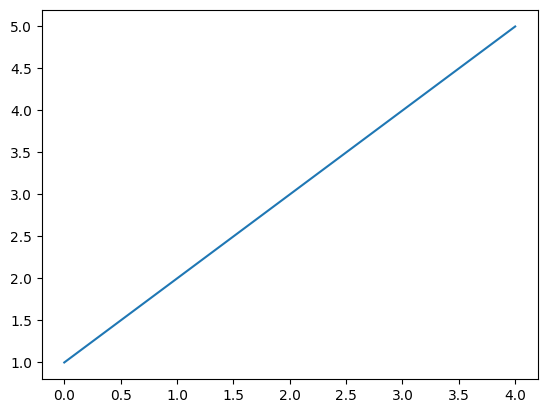

In [ ]:
# prompt: Using dataframe query1: create graph

import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 5])
plt.show()


<Axes: >

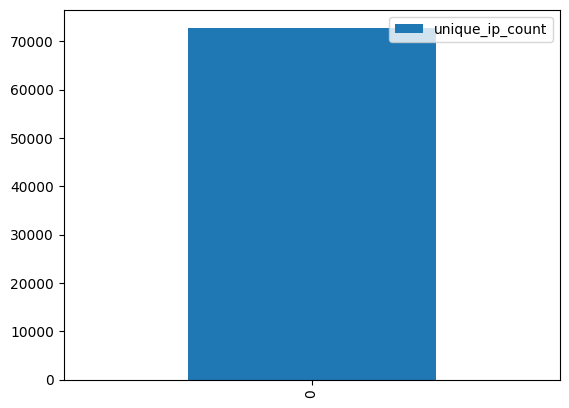

In [ ]:
# prompt: Using dataframe query2: create histogram
query2.toPandas().plot(kind='bar')

<Axes: >

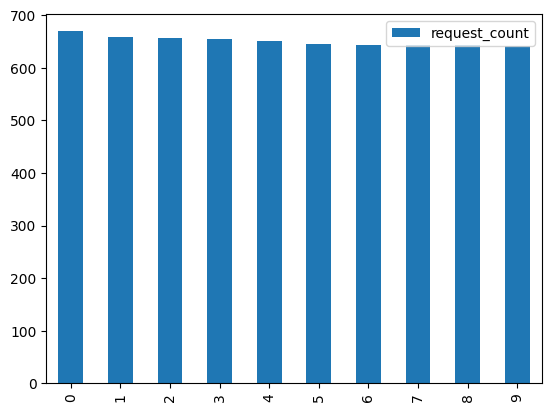

In [ ]:
query3.toPandas().plot(kind='bar')

<Axes: >

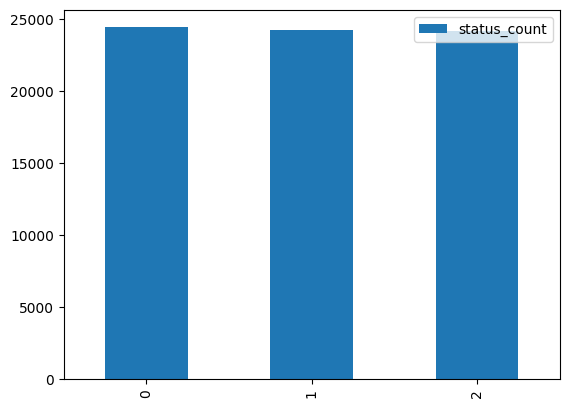

In [ ]:
query4.toPandas().plot(kind='bar')


# **Task 3 - LSEP (legal, social, ethical, and professional) considerations**

---


For all analyses performed, critically analyze the legal, social, ethical, and professional implications associated with the data and the analysis. Consider factors such as `data privacy`,` data protection`, `bias`, `fairness`, `transparency`, and the `potential impact` of the analysis on individuals or society as a whole.

**Each student should take one of these factors as their contribution.**

As a team, discuss and share your individual analyses and LSEP considerations with each other. Learn from each other's perspectives and insights.

## Student 1: chosen factor

<b>transparency</b>: In order to gain consumers' confidence, it is essential to be transparent while dealing with online datasets, especially those that include IP addresses. Companies should be forthright in their privacy policies, T&S, or user agreements about the data they gather, including IP addresses, to guarantee openness. It is important to properly communicate the aim of data gathering and to enlighten consumers about the ramifications and reasons behind it. The data of users should be safeguarded by implementing security measures such as encryption, access limits, and routine audits. Users should be informed about the engagement of third parties and given an explanation regarding geolocation information. Transparent communication of privacy rules and the ability for users to seek access to their data are essential.


Smith, M., Szongott, C., Henne, B. and Von Voigt, G., 2012, June. Big data privacy issues in public social media. In 2012 6th IEEE international conference on digital ecosystems and technologies (DEST) (pp. 1-6). IEEE.

## Student 2: chosen factor

<b>potential impact</b> There are pros and cons to collecting and analysing data from the web, including IP addresses. Some of the positive consequences include improved security, personalised experiences, assistance with debugging, protection against fraud, and geolocation services. But there are also possible downsides, such as problems with privacy, data breaches, erroneous geolocation data, third-party abuse, improper profiling, and legal and compliance issues. Data minimization, openness, consent, strong security measures, pseudonymization, anonymization, and frequent audits and compliance checks are all techniques for mitigation. Organisations may protect their users' privacy and security while keeping their data intact if they strike a balance between the benefits of online data and concerns about privacy and security.

Martin, K.D. and Murphy, P.E., 2017. The role of data privacy in marketing. Journal of the Academy of Marketing Science, 45, pp.135-155.


## Student 3: chosen factor

<b>Bias:</b> Although IP addresses are often linked to certain regions, they do not always reflect users' true physical locations. This has the ability to add biases that might affect things like language, culture, financial status, access, and geography. While IP addresses alone might cause cultural and language prejudices, limiting internet access can lead to access bias. Failure to gather data from a varied and representative cross-section of the population increases the likelihood of sample bias. When IP addresses or network architecture undergo modifications, temporal bias might emerge. Use of virtual private networks (VPNs) and proxy servers may potentially generate bias. Organisations may reduce bias by collecting data from a varied range of sources, being open and documented about their processes, making use of extra features, and following ethical data usage guidelines.

Yates, R. (2019) 'Bias on the web,' Communications of the ACM, 61(6), pp. 54–61. https://doi.org/10.1145/3209581.




In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

from pyspark.sql.functions import sha2

# Create a Spark session
spark = SparkSession.builder.appName("WebLogAnalysis").getOrCreate()

# Assuming 'web_log_df' is your DataFrame
# Anonymize the 'ip_address' column using sha2
web_log_df = web_log_df.withColumn('ip_address', F.sha2('ip_address', 256))

# Show the first few rows of the DataFrame
web_log_df.show()


+--------------------+--------------------+--------------------+-----------+----------+
|          ip_address|           timestamp|             request|status_code|bytes_sent|
+--------------------+--------------------+--------------------+-----------+----------+
|07937d8c029d2967d...|[04/Mar/2022:14:1...|  /history/missions/|  HTTP/2.0"|       414|
|4d58eb42b85ff962f...|[02/Sep/2022:15:1...| /security/firewall/| HTTPS/1.0"|       203|
|bf5b50142fd20511f...|[19/Jul/2022:01:3...|/web-development/...|  HTTP/1.0"|       201|
|8a11a5bf01179ead5...|[08/Feb/2022:11:3...|/networking/techn...|  HTTP/1.0"|       415|
|b6e7ab1861e40f13e...|[29/Aug/2023:03:0...| /security/firewall/|  HTTP/2.0"|       205|
|0d4b9dbb3f3e1f7c6...|[22/May/2023:09:4...|/web-development/...|  HTTP/1.0"|       200|
|d8e749b87b76b444a...|[22/Jan/2023:09:5...|    /history/apollo/|  HTTP/2.0"|       204|
|02c00aca9979a171e...|[28/Mar/2022:05:3...| /history/apollo-11/| HTTPS/1.0"|       414|
|39056fba6edd3ee06...|[25/Feb/20

In [ ]:
# Anonymizing user data
web_log_df = web_log_df.withColumn('ip_address', sha2('ip_address', 256))


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when

In [ ]:
# Applying fairness-aware techniques
web_log_df = web_log_df.withColumn('request_count', when(web_log_df['status_code'] == '404', 1).otherwise(0))


In [ ]:
# Communicating data usage to users
print("We use your data to improve our services. You can manage your privacy settings in the user dashboard.")


We use your data to improve our services. You can manage your privacy settings in the user dashboard.


# **Convert ipynb to HTML for Turnitin submission**

---



In [ ]:
# install nbconvert
#!pip3 install nbconvert


# convert ipynb to html
# file name: "Your_Group_ID_CN7031.ipynb
!jupyter nbconvert --to html Your_Group_ID_CN7031.ipynb

[NbConvertApp] WARNING | pattern 'Your_Group_ID_CN7031.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--ex